<a href="https://colab.research.google.com/github/KavishaMadani/machine-learning/blob/main/Decision_Tree_and_Regression_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Grow the decision tree using the entropy measure (ID3 algorithm) or gini index (CART algorithm).
Decision trees tend to be overly complex and do not generalize well to the data and thus, overfit. To
overcome this, Stopping criteria can be used such as setting the maximum depth of the tree T. Use
cross validation to find the value of depth of the tree, T that gives best performance. Plot average
accuracy vs. T. Plot (Visualize) the decision tree constructed on the training data.

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import KFold
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
data = pd.read_csv(url, names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'])
data_encoded = pd.get_dummies(data, drop_first=True)

In [ ]:
X = data_encoded.drop('class_unacc', axis=1)
y = data_encoded['class_unacc']

In [ ]:
depths = np.arange(1, 20)
avg_accuracies = []
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, criterion='entropy')
    scores = cross_val_score(clf, X, y, cv=5)
    avg_accuracy = np.mean(scores)
    avg_accuracies.append(avg_accuracy)

In [ ]:
optimal_depth = depths[np.argmax(avg_accuracies)]
print(f"Optimal tree depth: {optimal_depth}")

Optimal tree depth: 13


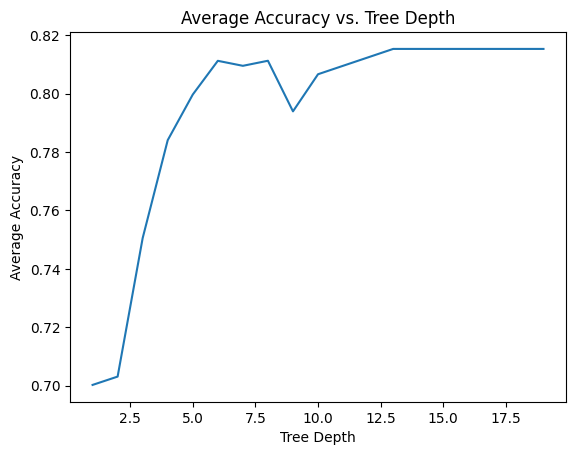

In [ ]:
plt.plot(depths, avg_accuracies)
plt.xlabel('Tree Depth')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy vs. Tree Depth')
plt.show()

In [ ]:
clf = DecisionTreeClassifier(max_depth=optimal_depth, criterion='entropy')
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=13)

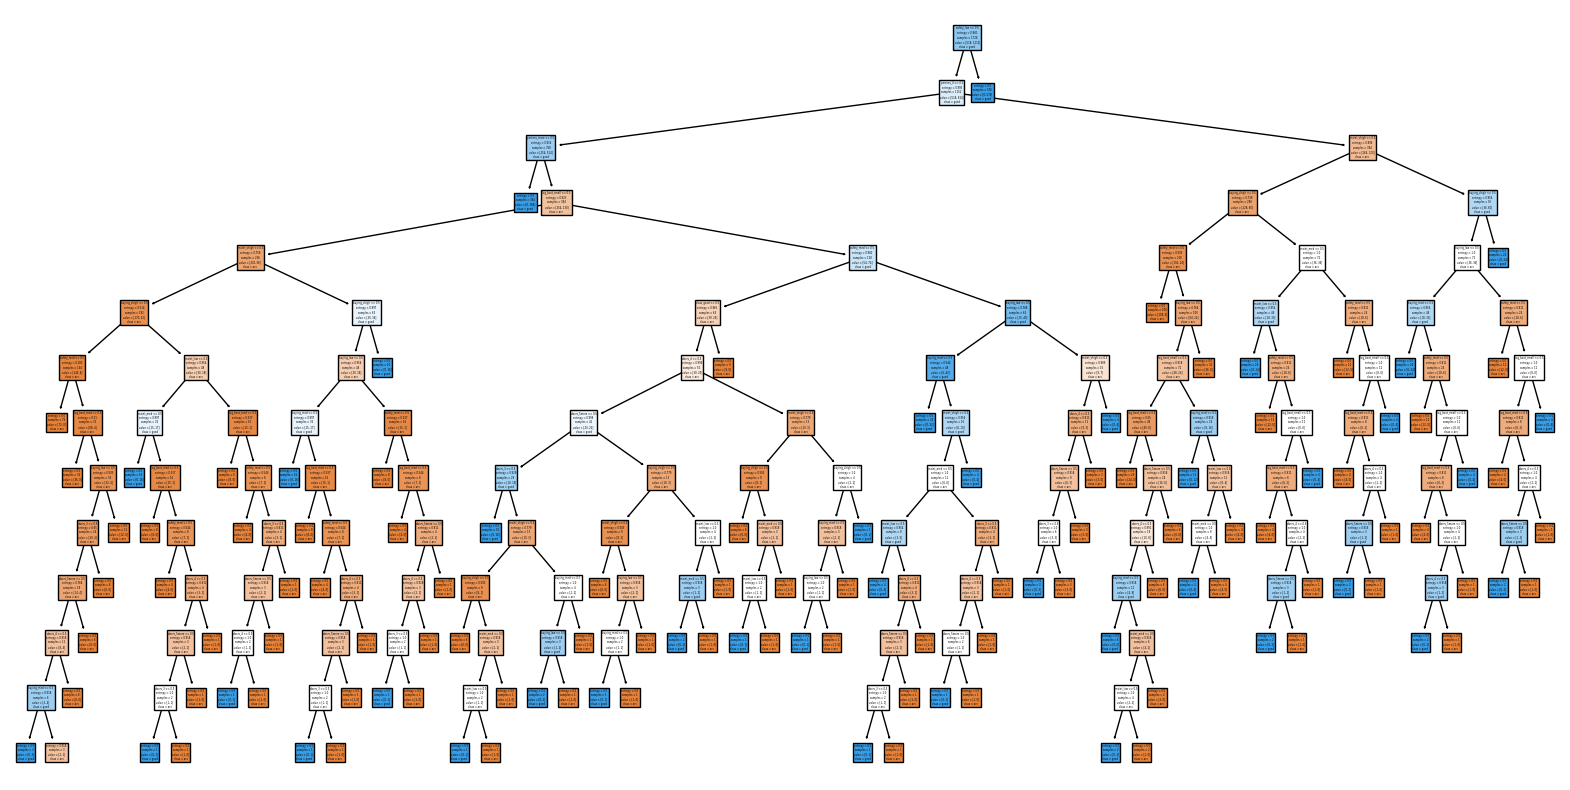

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['acc', 'good', 'unacc', 'vgood'])
plt.show()

Bagging: for the value of T identified above, perform bagging using B bootstrapped datasets (
You may consider B in the range of 50 to 500 with intervals of 50). Use cross validation to fix B.
Plot average accuracy against B.

In [ ]:
clf_base = DecisionTreeClassifier(max_depth=optimal_depth, criterion='entropy')

In [ ]:
B_values = np.arange(50, 501, 50)
avg_accuracies_bagging = []
for B in B_values:
    clf_bagging = BaggingClassifier(base_estimator=clf_base, n_estimators=B)
    scores = cross_val_score(clf_bagging, X, y, cv=5)
    avg_accuracy = np.mean(scores)
    avg_accuracies_bagging.append(avg_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

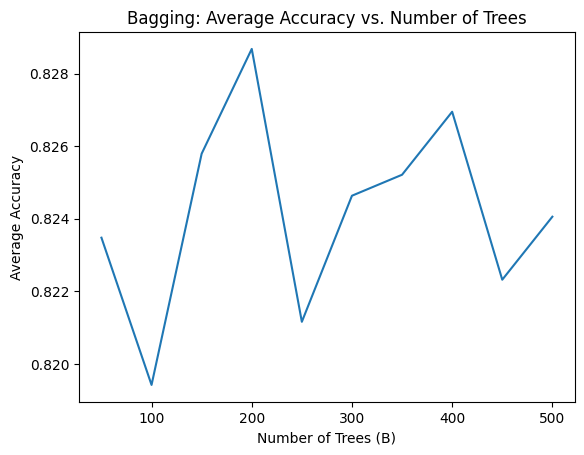

In [ ]:
plt.plot(B_values, avg_accuracies_bagging)
plt.xlabel('Number of Trees (B)')
plt.ylabel('Average Accuracy')
plt.title('Bagging: Average Accuracy vs. Number of Trees')
plt.show()

Random forest: Create a random forest of B trees with the value of B identified above. For each
tree, at each terminal node, randomly consider m out of d features (m can be a value between
sqrt(d) to d) for splitting. What is the average accuracy for m = 4?

In [ ]:
m_values = np.arange(int(np.sqrt(X.shape[1])), X.shape[1] + 1)
avg_accuracy_rf_m4 = []
for m in m_values:
    clf_rf = RandomForestClassifier(n_estimators=optimal_depth, max_features=m, criterion='entropy')
    scores = cross_val_score(clf_rf, X, y, cv=5)
    avg_accuracy = np.mean(scores)
    avg_accuracy_rf_m4.append(avg_accuracy)

In [ ]:
avg_accuracy_m4 = avg_accuracy_rf_m4[np.where(m_values == 4)[0][0]]
print(f"Average accuracy for m = 4: {avg_accuracy_m4}")

Average accuracy for m = 4: 0.810148278461925


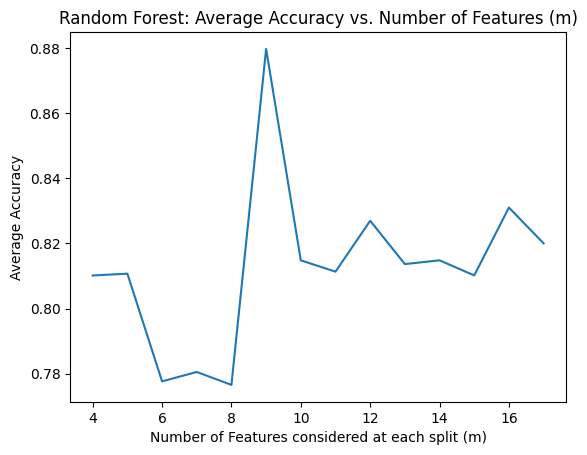

In [ ]:
plt.plot(m_values, avg_accuracy_rf_m4)
plt.xlabel('Number of Features considered at each split (m)')
plt.ylabel('Average Accuracy')
plt.title('Random Forest: Average Accuracy vs. Number of Features (m)')
plt.show()

Compare and comment on the classification accuracy of the original classification tree, bagged classi-
fication tree and the random forest.

In [ ]:
from sklearn.ensemble import BaggingClassifier
bagged_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=optimal_depth, criterion='entropy'),
                               n_estimators=10, random_state=0)
bagged_clf.fit(X, y)
bagged_scores = cross_val_score(bagged_clf, X, y, cv=5)
bagged_avg_accuracy = np.mean(bagged_scores)
print(f"Bagged Decision Tree Average Accuracy: {bagged_avg_accuracy}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Bagged Decision Tree Average Accuracy: 0.829821563206836


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=optimal_depth, random_state=0)
rf_clf.fit(X, y)
rf_scores = cross_val_score(rf_clf, X, y, cv=5)
rf_avg_accuracy = np.mean(rf_scores)
print(f"Random Forest Average Accuracy: {rf_avg_accuracy}")


Random Forest Average Accuracy: 0.8298651252408478


Grow the regression tree using recursive binary splitting. Decision trees tend to be overly complex and
do not generalize well to the data and thus, overfit. To overcome this, Stopping criteria can be used
such as setting the maximum depth of the tree or minimum samples in the terminal node S. Use S=4. Plot (Visualize) the decision tree constructed on the training data.

In [ ]:
data = pd.read_csv('HousingData.csv')
data.fillna(data.mean(), inplace=True)

In [ ]:
X = data.drop(columns=['MEDV'])
y = data['MEDV']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree_reg = DecisionTreeRegressor(min_samples_leaf=4, random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(min_samples_leaf=4, random_state=42)

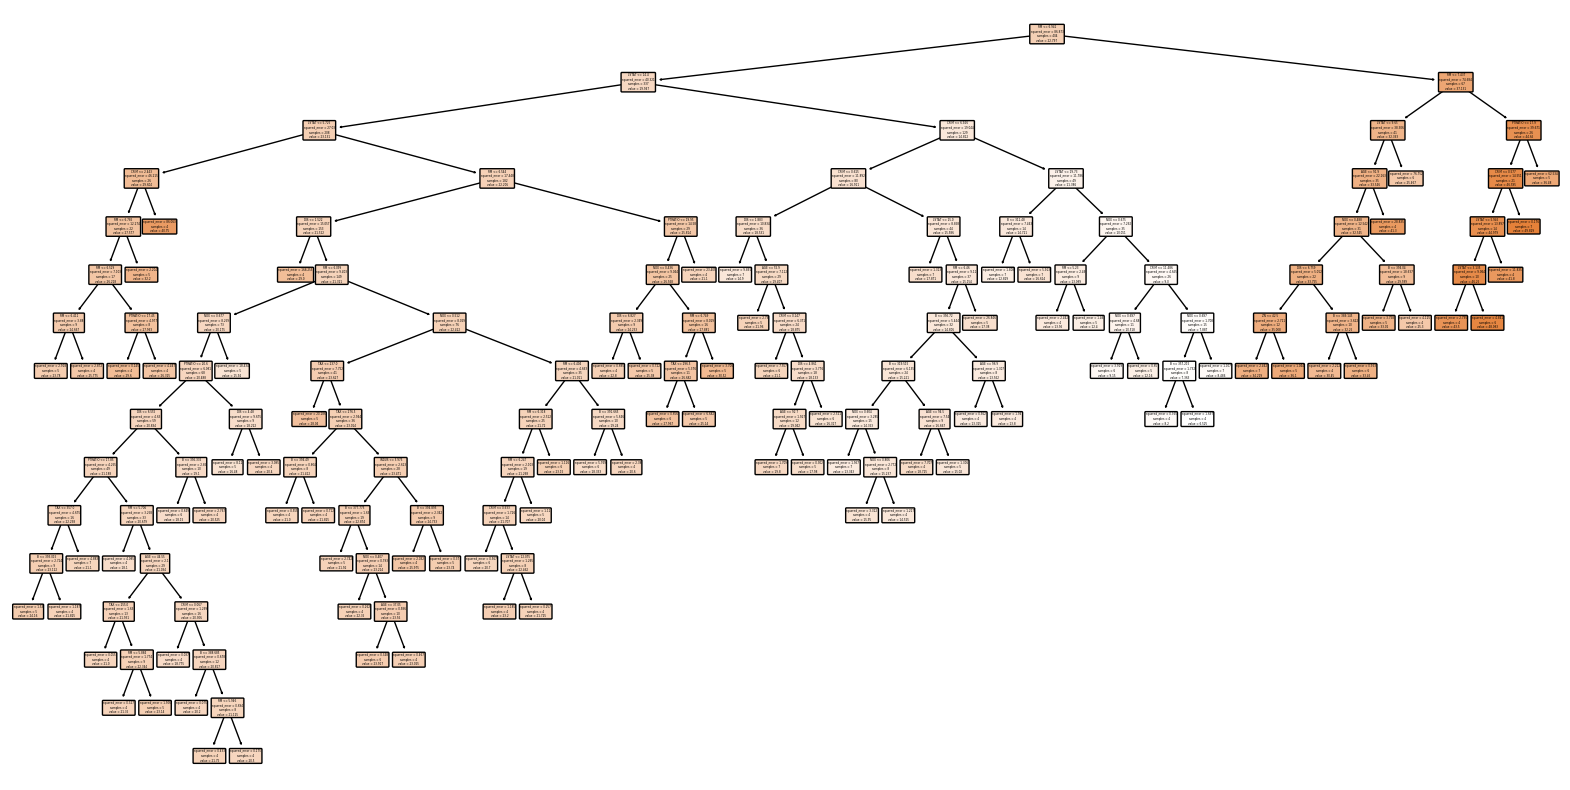

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(tree_reg, feature_names=X.columns, filled=True, rounded=True)
plt.show()

Bagging: for the value of S identified above, perform bagging using B bootstrapped datasets (You
may consider B in the range of 50 to 500 with intervals of 50). Use cross validation to fix B. Plot
average mean square error against B.

In [ ]:
B_values = np.arange(50, 551, 50)
avg_mse_bagging = []
for B in B_values:
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    mse_values = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        bagging_regressor = BaggingRegressor(n_estimators=B, random_state=42)
        bagging_regressor.fit(X_train, y_train)
        y_pred = bagging_regressor.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mse_values.append(mse)
    avg_mse = np.mean(mse_values)
    avg_mse_bagging.append(avg_mse)

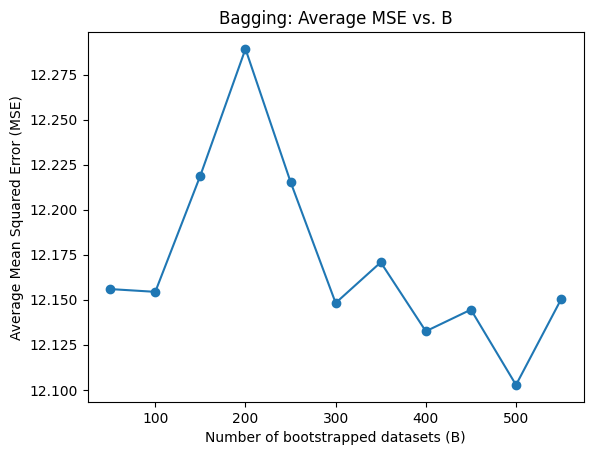

In [ ]:
plt.figure()
plt.plot(B_values, avg_mse_bagging, marker='o')
plt.xlabel('Number of bootstrapped datasets (B)')
plt.ylabel('Average Mean Squared Error (MSE)')
plt.title('Bagging: Average MSE vs. B')
plt.show()

Random forest: Create a random forest of B trees with the value of B identified above. For each
tree, at each terminal node, randomly consider m out of d features (m can be a value between
sqrt(d) to d) for splitting. What is the average accuracy for m = 7?

In [ ]:
m = 7
kf = KFold(n_splits=5, shuffle=True, random_state=42)
avg_mse_rf = []
for B in B_values:
    mse_values = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        rf_regressor = RandomForestRegressor(n_estimators=B, max_features=m, random_state=42)
        rf_regressor.fit(X_train, y_train)
        y_pred = rf_regressor.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mse_values.append(mse)
    avg_mse = np.mean(mse_values)
    avg_mse_rf.append(avg_mse)

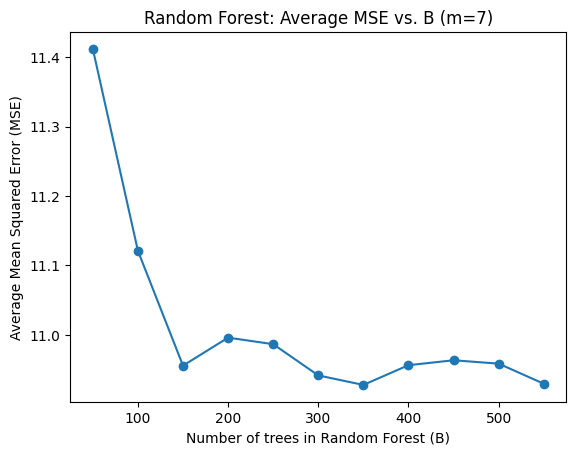

In [ ]:
plt.figure()
plt.plot(B_values, avg_mse_rf, marker='o')
plt.xlabel('Number of trees in Random Forest (B)')
plt.ylabel('Average Mean Squared Error (MSE)')
plt.title('Random Forest: Average MSE vs. B (m=7)')
plt.show()

Compare the variance (in prediction) for the original regression tree, bagged regression tree and the
random forest.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Original Regression Tree
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)
y_pred_tree = tree_regressor.predict(X_test)
variance_tree = np.var(y_pred_tree)

# Bagged Regression Tree
bagging_regressor = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42)
bagging_regressor.fit(X_train, y_train)
y_pred_bagging = bagging_regressor.predict(X_test)
variance_bagging = np.var(y_pred_bagging)

# Random Forest
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred_rf = rf_regressor.predict(X_test)
variance_rf = np.var(y_pred_rf)

print("Variance of predictions:")
print("Original Regression Tree:", variance_tree)
print("Bagged Regression Tree:", variance_bagging)
print("Random Forest:", variance_rf)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Variance of predictions:
Original Regression Tree: 65.7936841599385
Bagged Regression Tree: 61.48290424500196
Random Forest: 61.98667142608617


Plot the regression curve for MEDV vs. CRIM (per capita crime rate by town), MEDV vs. INDUS
(proportion of non-retail business acres per town) and MEDV vs. AGE (proportion of owner-occupied
units built prior to 1940)

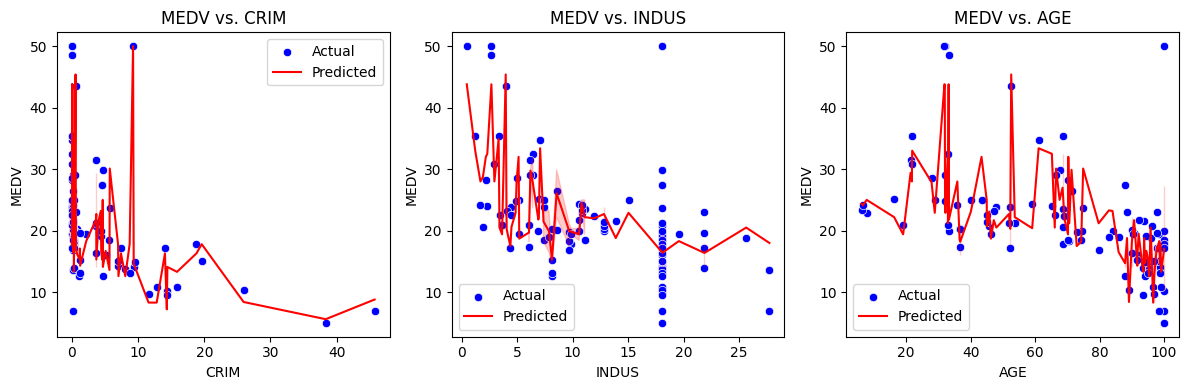

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a decision tree regressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Predict on test set
y_pred = regressor.predict(X_test)

# Plot regression curve for MEDV vs. CRIM
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.scatterplot(x=X_test['CRIM'], y=y_test, color='blue', label='Actual')
sns.lineplot(x=X_test['CRIM'], y=y_pred, color='red', label='Predicted')
plt.xlabel('CRIM')
plt.ylabel('MEDV')
plt.title('MEDV vs. CRIM')

# Plot regression curve for MEDV vs. INDUS
plt.subplot(1, 3, 2)
sns.scatterplot(x=X_test['INDUS'], y=y_test, color='blue', label='Actual')
sns.lineplot(x=X_test['INDUS'], y=y_pred, color='red', label='Predicted')
plt.xlabel('INDUS')
plt.ylabel('MEDV')
plt.title('MEDV vs. INDUS')

# Plot regression curve for MEDV vs. AGE
plt.subplot(1, 3, 3)
sns.scatterplot(x=X_test['AGE'], y=y_test, color='blue', label='Actual')
sns.lineplot(x=X_test['AGE'], y=y_pred, color='red', label='Predicted')
plt.xlabel('AGE')
plt.ylabel('MEDV')
plt.title('MEDV vs. AGE')

plt.tight_layout()
plt.show()
